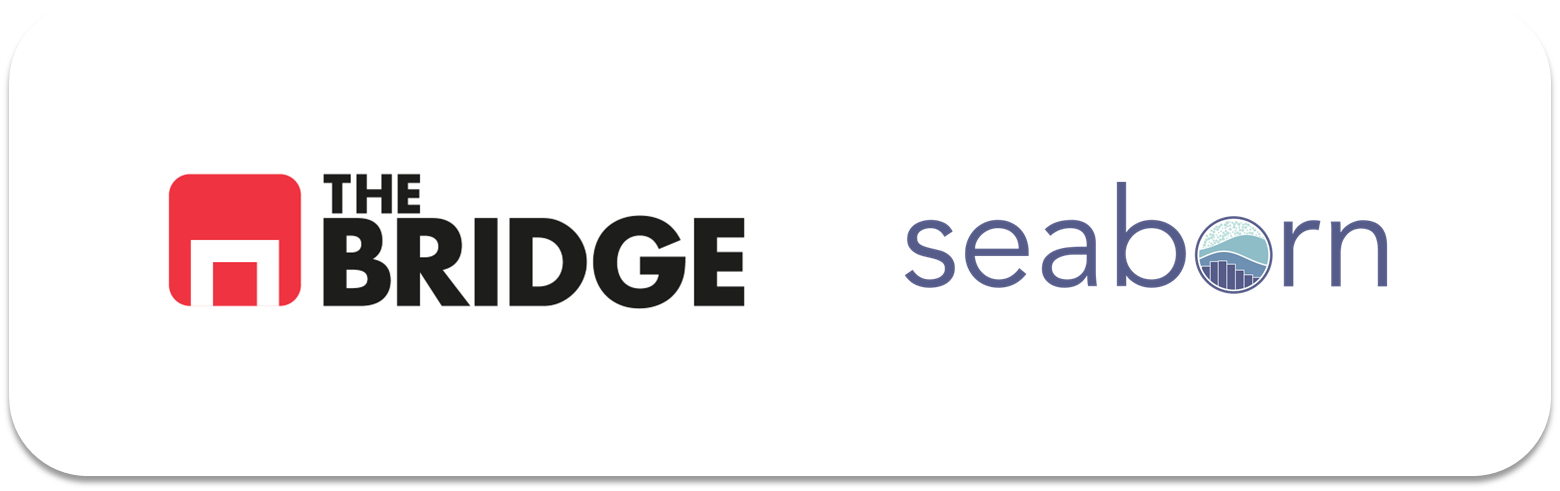

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df_calif = pd.read_csv("./data/california_cities.csv")
df_calif


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [3]:
df_calif.isnull().sum()

Unnamed: 0             0
city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [5]:
df_calif = df_calif.dropna()
df_calif.isnull().sum()

Unnamed: 0            0
city                  0
latd                  0
longd                 0
elevation_m           0
elevation_ft          0
population_total      0
area_total_sq_mi      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
dtype: int64

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [11]:
def diagrama_dispersion_avanzado(df, col_x, col_y, col_cat=None, size_param=50, escala=1, mostrar_leyenda=True):
    plt.figure(figsize=(8,6))
    if isinstance(size_param, str): #Determina tamaño de los puntos, es una columna del df
        sizes = df[size_param] * escala
    else:
        sizes = size_param
    if not mostrar_leyenda and col_cat:
        scatter = plt.scatter( # Pinta el gráfico
            df[col_x],
            df[col_y],
            c=df[col_cat],
            s=sizes,
            cmap="viridis",
            alpha=0.7,
        )
        cbar = plt.colorbar(scatter)
        cbar.set_label(col_cat)
    else:
        sns.scatterplot(
            data=df,
            x=col_x,
            y=col_y,
            hue=col_cat if col_cat else None,
            size=sizes,
            sizes=(20,200),
            alpha=0.7,
            palette="viridis" if col_cat else None,
            legend='brief' if mostrar_leyenda else False
        )
    plt.title(f'Dispersión: {col_y} vs {col_x}') #Títulos y ejes
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.grid(True)  
    plt.tight_layout()
    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

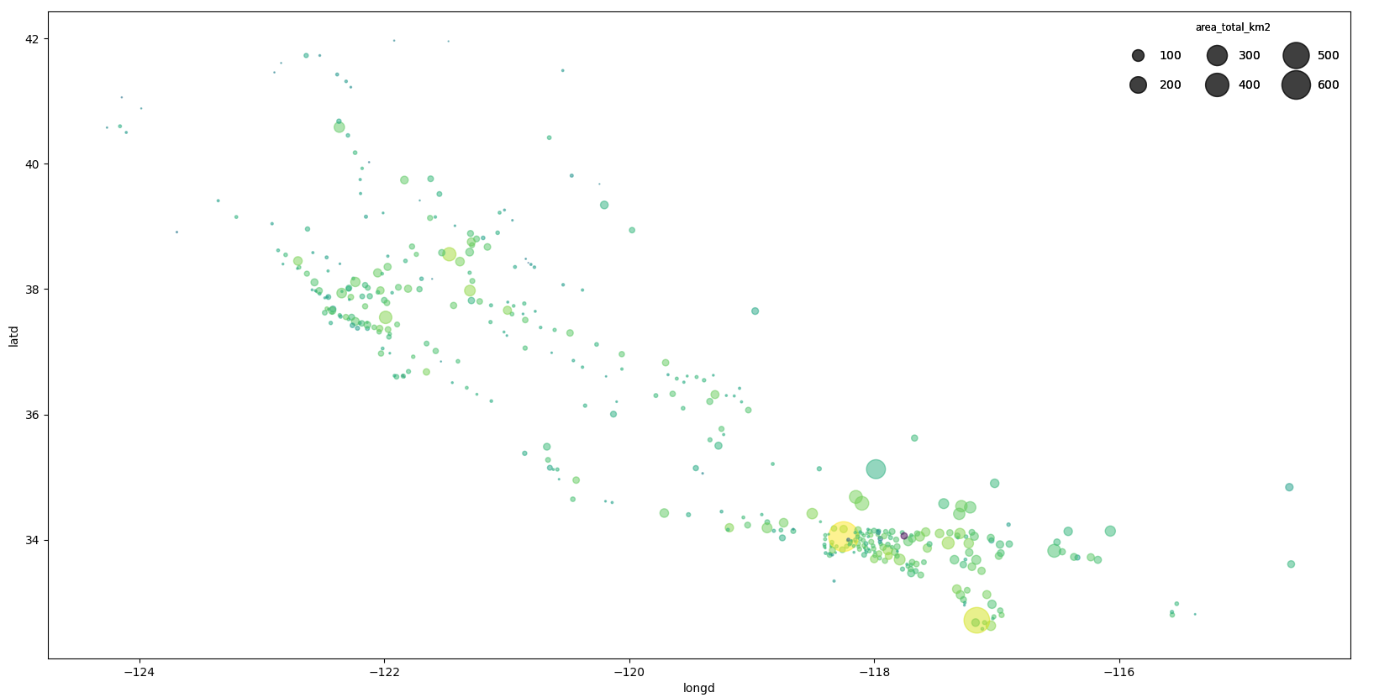

In [7]:
df_calif['log_poblacion'] = np.log10(df_calif['population_total'])

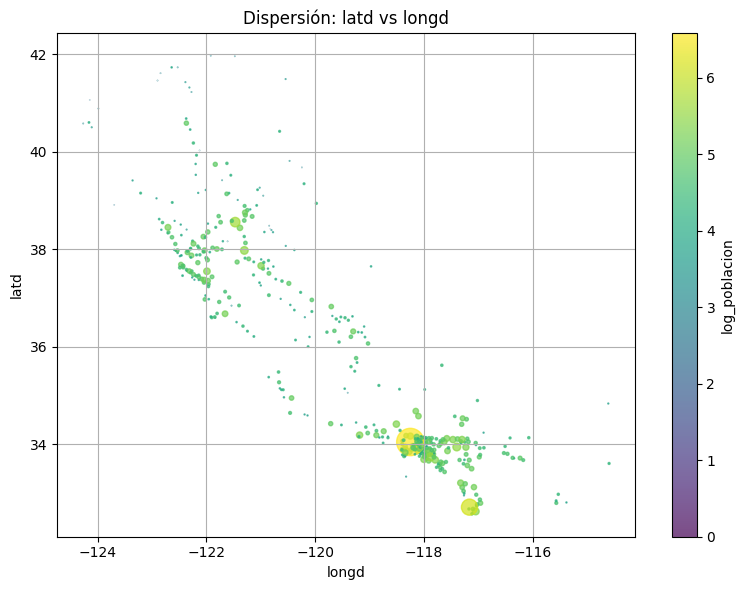

In [12]:
diagrama_dispersion_avanzado(
    df_calif,
    col_x='longd',
    col_y='latd',
    col_cat='log_poblacion',
    size_param='population_total',
    escala=1/10000,
    mostrar_leyenda=False
)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic
import math

In [3]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
def freq_absolutas(df, cat_columns):  #Recibe un df y una lista de nombres de columnas categóricas
    n_cols = 2 #Dos columnas por fila
    n_rows = math.ceil(len(cat_columns) / n_cols) #Calculamos cuantas filas necesitamos para redondear hacia arriba por si el nº de columnas no es múltiplo de 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))#creación de subplots
    axes = axes.flatten() #convierte la matriz de subplots en lista plana para poder iterar sobre ella

    for i, col in enumerate(cat_columns): #bucle para dibujar cada gráfico. Te da indice y nombre de cada columna
        sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='Set2', legend=False) #dibuja diagrama de barras con frecuencias absolutas (cuenta cuantas veces aparece cada valor), y indice donde dibujar cada gráfico
        axes[i].set_title(f"Frecuencias Absolutas de {col}")  #añade título del gráfico
        axes[i].tick_params(axis='x', rotation=45) #rota las etiquetas del eje x para que no se solapen si son muchas
    for j in range(len(cat_columns), len(axes)): #elimina subgráficos vacios (p ej con 5 columnas y una cuadricula de 6 espacios)
        fig.delaxes(axes[j])

    plt.tight_layout() #ajusta el espacio entre graficos para que no se solapen titulos o ejes
    plt.savefig("freq_absolutas.png", dpi=300, bbox_inches='tight')
    plt.show()

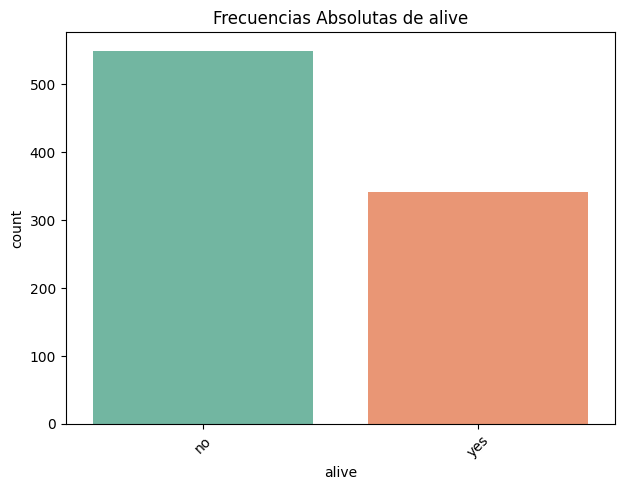

Tasa de mortalidad: 61.62%


In [8]:
#Slide 1 : Mortalidad global
freq_absolutas(df_titanic, ['alive'])

#Porcentaje de fallecidos
tasa_mortalidad = (df_titanic['alive'] == 'no').mean() * 100
print(f"Tasa de mortalidad: {tasa_mortalidad:.2f}%")

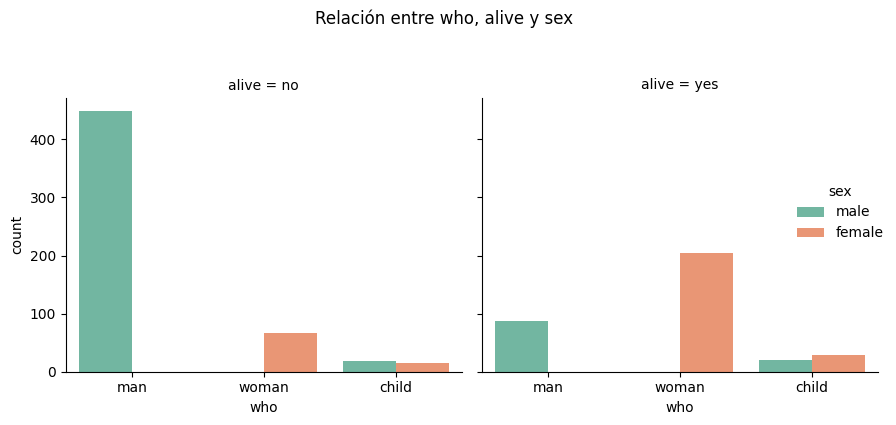

In [11]:
# Slide 2: Mujeres y niños primero
def plot_categorical_relationship_fin(df, var_cat1, var_cat2, target):
    sns.catplot(
        data=df,
        x=var_cat1,
        hue=target,
        col=var_cat2,
        kind='count',
        palette='Set2',
        height=4,
        aspect=1
    )
    plt.suptitle(f'Relación entre {var_cat1}, {var_cat2} y {target}', y=1.05)
    plt.tight_layout()
    plt.savefig("mujeres_niños.png", dpi=300, bbox_inches='tight')
    plt.show()

plot_categorical_relationship_fin(df_titanic, var_cat1='who', var_cat2='alive', target='sex')


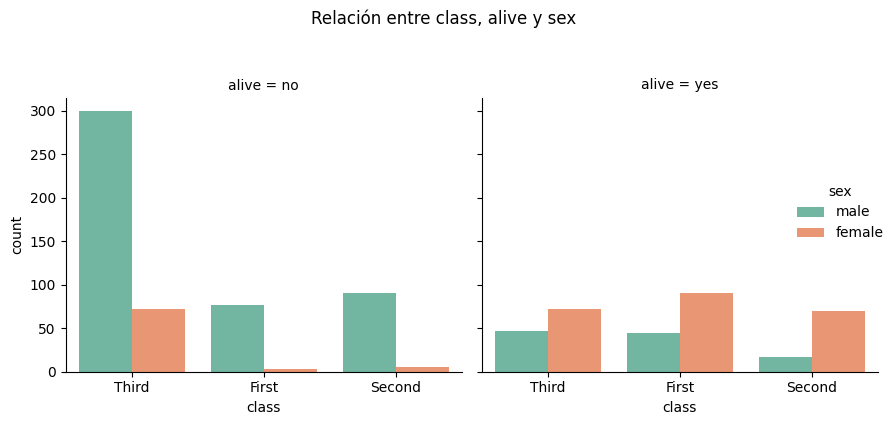

In [14]:
#Slide 3: La clase influye significativamente
def plot_categorical_relationship_cl(df, var_cat1, var_cat2, target):
    sns.catplot(
        data=df,
        x=var_cat1,
        hue=target,
        col=var_cat2,
        kind='count',
        palette='Set2',
        height=4,
        aspect=1
    )
    plt.suptitle(f'Relación entre {var_cat1}, {var_cat2} y {target}', y=1.05)
    plt.tight_layout()
    plt.savefig("clase.png", dpi=300, bbox_inches='tight')
    plt.show()
plot_categorical_relationship_cl(df_titanic, var_cat1='class', var_cat2='alive', target='sex')

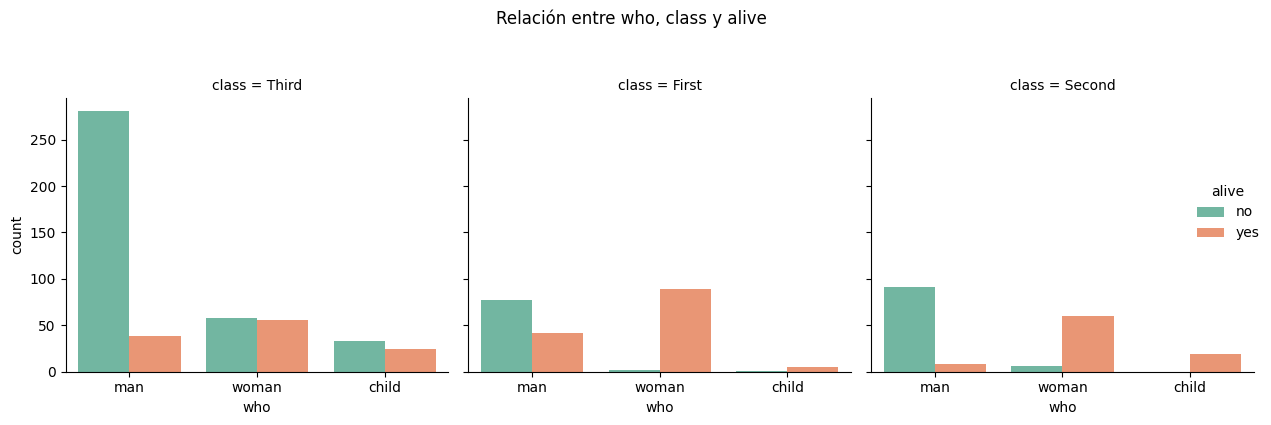

In [16]:
# Slide 4 - Diferencias entre mujeres y niños
def plot_categorical_relationship_muj(df, var_cat1, var_cat2, target):
    sns.catplot(
        data=df,
        x=var_cat1,
        hue=target,
        col=var_cat2,
        kind='count',
        palette='Set2',
        height=4,
        aspect=1
    )
    plt.suptitle(f'Relación entre {var_cat1}, {var_cat2} y {target}', y=1.05)
    plt.tight_layout()
    plt.savefig("dif_mujeres_niños.png", dpi=300, bbox_inches='tight')
    plt.show()
plot_categorical_relationship_muj(df_titanic, var_cat1='who', var_cat2='class', target='alive')

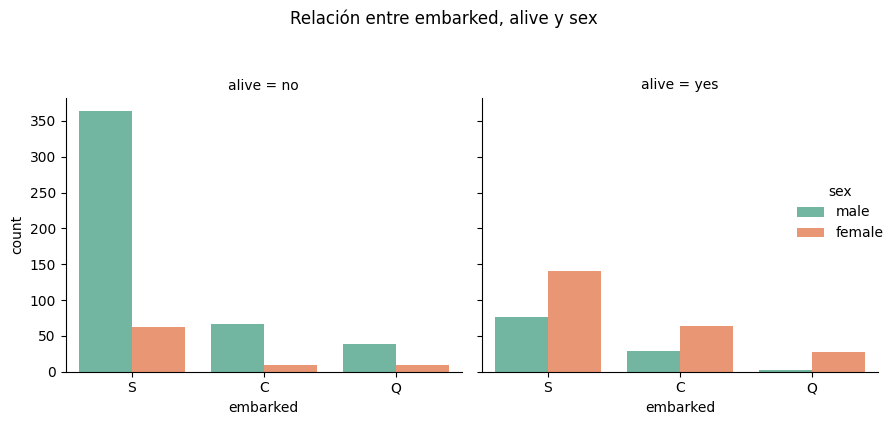

In [17]:
# Slide 5 - El puerto de embarque parece influir
def plot_categorical_relationship_puer(df, var_cat1, var_cat2, target):
    sns.catplot(
        data=df,
        x=var_cat1,
        hue=target,
        col=var_cat2,
        kind='count',
        palette='Set2',
        height=4,
        aspect=1
    )
    plt.suptitle(f'Relación entre {var_cat1}, {var_cat2} y {target}', y=1.05)
    plt.tight_layout()
    plt.savefig("puerto.png", dpi=300, bbox_inches='tight')
    plt.show()
plot_categorical_relationship_puer(df_titanic, var_cat1='embarked', var_cat2='alive', target='sex')


In [18]:
def plot_grouped_boxplots(df, col_cat, col_num, title=None, palette='Set2'):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col_cat, y=col_num, palette=palette)
    plt.xlabel(col_cat)
    plt.ylabel(col_num)
    if title:
        plt.title(title)
    else:
        plt.title(f"{col_num} por {col_cat}")
    plt.savefig("puerto_precio.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

C:\Users\sanlo\AppData\Local\Temp\ipykernel_1612\3691969738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col_cat, y=col_num, palette=palette)


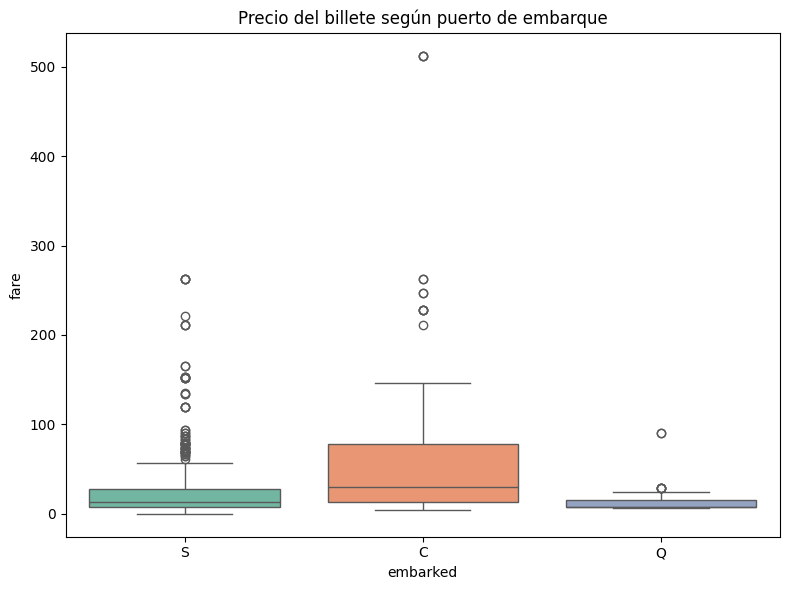

In [19]:
plot_grouped_boxplots(df_titanic, 'embarked', 'fare', title='Precio del billete según puerto de embarque')



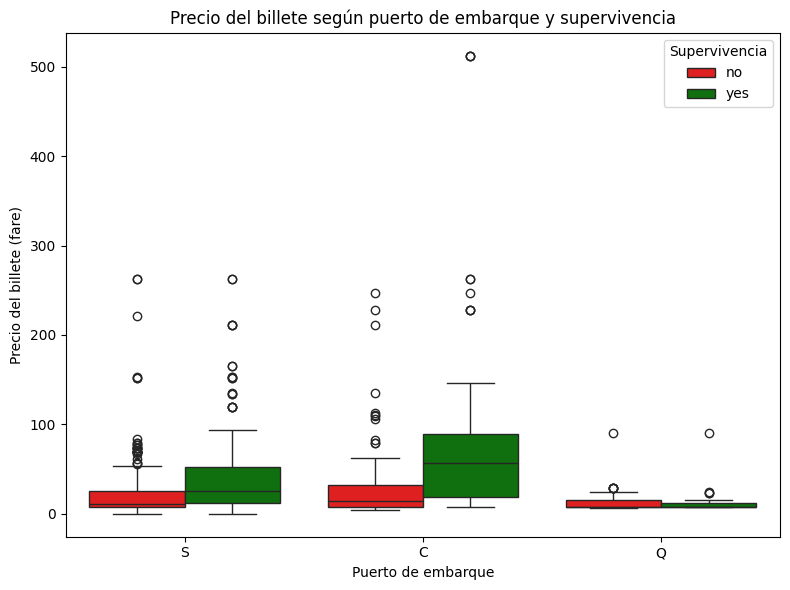

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_titanic, x='embarked', y='fare', hue='alive', palette={'yes': 'green', 'no': 'red'})
plt.title('Precio del billete según puerto de embarque y supervivencia')
plt.xlabel('Puerto de embarque')
plt.ylabel('Precio del billete (fare)')
plt.legend(title='Supervivencia')
plt.savefig("puerto_sup.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



In [97]:
# Tasa de supervivencia por grupo y clase (%):
tabla = pd.crosstab([df_titanic['who'], df_titanic['class']], df_titanic['alive'], normalize='index') * 100
print("Tasa de supervivencia por grupo y clase (%):")
print(tabla.round(2))


Tasa de supervivencia por grupo y clase (%):
alive            no     yes
who   class                
child First   16.67   83.33
      Second   0.00  100.00
      Third   56.90   43.10
man   First   64.71   35.29
      Second  91.92    8.08
      Third   88.09   11.91
woman First    2.20   97.80
      Second   9.09   90.91
      Third   50.88   49.12
